# import modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_colwidth', None)
import matplotlib
from adjustText import adjust_text

matplotlib.rcParams['pdf.fonttype'] = 42

# load dataframes

In [2]:
#clone2

c2s34flacz_jbPSI = pd.read_csv('Desktop/nonredundant_c2s34flacz.txt', sep='\t')
c2wtkv12_jbPSI = pd.read_csv('Desktop/nonredundant_c2wtkv12.txt', sep='\t')
c2s34fkv12_jbPSI = pd.read_csv('Desktop/nonredundant_c2s34fkv12.txt', sep='\t')
c2s34fkv12_jbPSI.head()

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/2361214709.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  c2s34flacz_jbPSI = pd.read_csv('Desktop/nonredundant_c2s34flacz.txt', sep='\t')
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/2361214709.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  c2wtkv12_jbPSI = pd.read_csv('Desktop/nonredundant_c2wtkv12.txt', sep='\t')


,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,chr,strand,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,...,wt2_krasWT_rep2,wt2_krasWT_rep3,wt2_lacz_rep1,wt2_lacz_rep2,wt2_lacz_rep3,set1_med,set2_med,delta_val,raw_pval,corrected_pval
0,N,alternative_last_exon,NaN,chr12,+,chr12:123751230-123752284;chr12:123751230-123757926,chr12:123751230-123752282,chr12:123757927-123761755,chr12:123752283-123752402,NaN,...,100.00,100.00,100.00,90.00,100.00,100.00,100.00,0.00,0.744380,0.859963
1,K,alternative_last_exon,ENSG00000133612.19,chr7,+,chr7:151120746-151123793,chr7:151120746-151122724,chr7:151123794-151123886,chr7:151122725-151123638,NaN,...,75.00,94.12,74.07,81.25,79.31,79.31,85.00,5.69,0.304870,0.682610
2,K,alternative_last_exon,ENSG00000158604.15,chr7,-,chr7:44574190-44581448;chr7:44579629-44581448,chr7:44581240-44581448,chr7:44577894-44579628,chr7:44579897-44581239,NaN,...,100.00,87.50,87.18,97.50,95.65,95.65,90.38,-5.27,0.316601,0.682610
3,K,alternative_last_exon,ENSG00000198715.13,chr1,-,"chr1:156293354-156294017,chr1:156293711-156294017,chr1:156290361-156294017;chr1:156293210-156294017","chr1:156293430-156294017,chr1:156293577-156294017",chr1:156292687-156293209,chr1:156293320-156293429,NaN,...,88.73,93.75,95.24,84.48,95.12,95.12,97.22,2.10,0.348102,0.682610
4,K,alternative_last_exon,ENSG00000205758.12,chr21,-,chr21:33616601-33616705;chr21:33613607-33616705,chr21:33616604-33616705,chr21:33613538-33613606,chr21:33616287-33616603,NaN,...,13.64,4.35,17.95,21.95,19.44,19.44,5.88,-13.56,0.001828,0.303967


# Remove irrelevant columns

In [3]:
working_c2s34flacz = c2s34flacz_jbPSI.loc[:, c2s34flacz_jbPSI.columns.isin(['#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                                    'as_event_type', 'gene_name', 'delta_val', 'corrected_pval',
                                                                           'exclusion_junctions', 'inclusion_junctions', 'exclusion_exons',
                                                                           'inclusion_exons', 'intron-exon_junctions', 'neighboring_constitutive_exons'])]
working_c2wtkv12 = c2wtkv12_jbPSI.loc[:, c2wtkv12_jbPSI.columns.isin(['#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                                    'as_event_type', 'gene_name', 'delta_val', 'corrected_pval',
                                                                     'exclusion_junctions', 'inclusion_junctions', 'exclusion_exons',
                                                                           'inclusion_exons', 'intron-exon_junctions', 'neighboring_constitutive_exons'])]
working_c2s34fkv12 = c2s34fkv12_jbPSI.loc[:,c2s34fkv12_jbPSI.columns.isin(['#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                                    'as_event_type', 'gene_name', 'delta_val', 'corrected_pval',
                                                                          'exclusion_junctions', 'inclusion_junctions', 'exclusion_exons',
                                                                           'inclusion_exons', 'intron-exon_junctions', 'neighboring_constitutive_exons'])]
working_c2s34fkv12.head(3)

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,corrected_pval
0,N,alternative_last_exon,NaN,chr12:123751230-123752284;chr12:123751230-123757926,chr12:123751230-123752282,chr12:123757927-123761755,chr12:123752283-123752402,NaN,NaN,0.00,0.859963
1,K,alternative_last_exon,ENSG00000133612.19,chr7:151120746-151123793,chr7:151120746-151122724,chr7:151123794-151123886,chr7:151122725-151123638,NaN,NaN,5.69,0.682610
2,K,alternative_last_exon,ENSG00000158604.15,chr7:44574190-44581448;chr7:44579629-44581448,chr7:44581240-44581448,chr7:44577894-44579628,chr7:44579897-44581239,NaN,NaN,-5.27,0.682610


# convert ENSG IDs to gene names

In [4]:
with open ('Desktop/gencode.v33.primary_assembly.annotation.gtf') as f:
    gtf = list(f)

gtf = [x for x in gtf if not x.startswith('#')]
gtf = [x for x in gtf if 'gene_name "' in x]

#grab everything that has gene ID and gene name
#only get lines with gene id and gene name
# gtf = [x for x in gtf if 'gene id "' in x and 'gene_name "' in x]
gtf_list = list(map(lambda x: (x.split('gene_id "')[1].split('"')[0], x.split('gene_name "')[1].split('"')[0]), gtf))
gtfset = set(gtf_list)
gtfdict = dict(gtfset)
len(gtfset)

60721

In [5]:
#convert ENSG IDS to gene names in dataframes

dflist = [working_c2s34flacz, working_c2wtkv12, working_c2s34fkv12]

for df in dflist:
    df['GeneName'] = df['gene_name'].map(gtfdict)


/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/3169545468.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GeneName'] = df['gene_name'].map(gtfdict)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/3169545468.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GeneName'] = df['gene_name'].map(gtfdict)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/3169545468.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

# Print splicing events with NA values for manual gene name annotation
## - JuncBASE has a bug where some splicing events will not be properly annotated with a gene name. 
## - For these events, we will manually assign gene name by viewing the coordinates on IGV and looking at what genes the coordinates belong to

In [19]:
working_c2s34flacz.head()

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,corrected_pval,GeneName
0,K,alternative_last_exon,ENSG00000163281.12,"chr4:44703165-44707751,chr4:44692786-44707751,chr4:44705492-44707751;chr4:44682643-44707751",chr4:44703143-44707751,chr4:44682582-44682642,chr4:44701795-44703142,NaN,NaN,2.09,0.588203,GNPDA2
1,N,alternative_last_exon,ENSG00000127957.18,"chr7:75514385-75514644,chr7:75511290-75514644,chr7:75512341-75514644;chr7:75353656-75514644;chr7:75297761-75514644;chr7:75325730-75514644;chr7:75511115-75514644",chr7:75512676-75514644,chr7:75353569-75353655;chr7:75297674-75297760;chr7:75325643-75325729;chr7:75510931-75511114,chr7:75512589-75512675,NaN,NaN,-9.09,0.728301,PMS2P3
2,K,alternative_last_exon,ENSG00000181690.8,chr8:56168688-56171090;chr8:56167504-56171090,chr8:56168387-56171090,chr8:56160909-56167503,chr8:56168028-56168386,NaN,NaN,-6.26,0.849005,PLAG1
3,N,alternative_last_exon,ENSG00000228221.6,chr3:45672821-45676921,chr3:45672821-45673453,chr3:45676922-45686341,chr3:45673454-45673898,NaN,NaN,-8.33,0.692487,LINC00578
4,K,alternative_last_exon,ENSG00000158604.15,chr7:44574190-44581448;chr7:44579629-44581448,chr7:44581240-44581448,chr7:44577894-44579628,chr7:44579897-44581239,NaN,NaN,-20.09,0.195584,TMED4


In [7]:
#do this for events that have corrected pval < 0.25 and exclude junction only events (threshold for GSEA)
    
c2s34flacz_nas = working_c2s34flacz.loc[(working_c2s34flacz['GeneName'].isna()) 
                       & (working_c2s34flacz['corrected_pval'] < 0.25)
                      & (working_c2s34flacz['as_event_type'] != 'jcn_only_AA')
                      & (working_c2s34flacz['as_event_type'] != 'jcn_only_AD')]

c2wtkv12_nas = working_c2wtkv12.loc[(working_c2wtkv12['GeneName'].isna()) 
                       & (working_c2wtkv12['corrected_pval'] < 0.25)
                      & (working_c2wtkv12['as_event_type'] != 'jcn_only_AA')
                      & (working_c2wtkv12['as_event_type'] != 'jcn_only_AD')]

c2s34fkv12_nas = working_c2s34fkv12.loc[(working_c2s34fkv12['GeneName'].isna()) 
                       & (working_c2s34fkv12['corrected_pval'] < 0.25)
                      & (working_c2s34fkv12['as_event_type'] != 'jcn_only_AA')
                      & (working_c2s34fkv12['as_event_type'] != 'jcn_only_AD')]

c2s34fkv12_nas.head()

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,corrected_pval,GeneName
95,K,alternative_last_exon,"ENSG00000240445.4,ENSG00000249459.10",chr17:18645852-18680740;chr17:18663228-18680740,chr17:18673056-18680740,chr17:18658429-18663227,chr17:18667629-18673055,NaN,NaN,-9.63,0.112156,NaN
11509,N,alternative_donor,NaN,chr16:56626212-56636438;chr16:56626268-56636438;chr16:56625229-56636438;chr16:56625383-56636438,chr16:56625880-56636438,NaN,chr16:56625229-56625382;chr16:56625383-56625879;chr16:56625880-56626211;chr16:56626212-56626267,chr16:56625228-56625229;chr16:56625382-56625383;chr16:56625879-56625880;chr16:56626211-56626212,NaN,19.27,0.243627,NaN
12259,N,alternative_donor,NaN,chr12:68816946-68820348,chr12:68818874-68820348,NaN,chr12:68816946-68818873,chr12:68816945-68816946,NaN,54.90,0.243627,NaN
13026,N,alternative_donor,NaN,chr4:152780092-152790758,chr4:152780227-152790758,NaN,chr4:152780092-152780226,chr4:152780091-152780092,NaN,4.76,0.243627,NaN
13081,N,alternative_donor,NaN,chr8:143577944-143578032;chr8:143577944-143579778,chr8:143577944-143578092,NaN,chr8:143578033-143578092;chr8:143578093-143579778,chr8:143578092-143578093;chr8:143579778-143579779,NaN,5.88,0.243627,NaN


In [16]:
with pd.ExcelWriter('Desktop/c2juncbase_NANs.xlsx') as writer:  
    c2s34flacz_nas.to_excel(writer, sheet_name='c2s34flacz_nas')
    c2wtkv12_nas.to_excel(writer, sheet_name='c2wtkv12_nas')
    c2s34fkv12_nas.to_excel(writer, sheet_name='c2s34fkv12_nas')

In [8]:
#load CSV of these events with gene names manually filled in
named_c2s34flacz = pd.read_csv('Downloads/c2juncbase_NANs.xlsx - c2s34flacz_nas.csv')
named_c2wtkv12 = pd.read_csv('Downloads/c2juncbase_NANs.xlsx - c2wtkv12_nas.csv')
named_c2s34fkv12 = pd.read_csv('Downloads/c2juncbase_NANs.xlsx - c2s34fkv12_nas.csv')


#make dictionary of manually filled events to junctions
nameds34flacz_dict = named_c2s34flacz.set_index('exclusion_junctions')['GeneName'].to_dict()
namedwtkv12_dict = named_c2wtkv12.set_index('exclusion_junctions')['GeneName'].to_dict()
nameds34fkv12_dict = named_c2s34fkv12.set_index('exclusion_junctions')['GeneName'].to_dict()

#map each exclusion jnction to gene name and check for NAs remaining 
#There are one or two in S34F LACZ and S34F KV12 because the events didnt have any reads on IGV 
#or mapped to weird intergenic regioms

c2s34flacz_nas['GeneName'] = c2s34flacz_nas['exclusion_junctions'].map(nameds34flacz_dict)
c2wtkv12_nas['GeneName'] = c2wtkv12_nas['exclusion_junctions'].map(namedwtkv12_dict)
c2s34fkv12_nas['GeneName'] = c2s34fkv12_nas['exclusion_junctions'].map(nameds34fkv12_dict)


c2s34fkv12_nas

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/1791765802.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2s34flacz_nas['GeneName'] = c2s34flacz_nas['exclusion_junctions'].map(nameds34flacz_dict)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/1791765802.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2wtkv12_nas['GeneName'] = c2wtkv12_nas['exclusion_junctions'].map(namedwtkv12_dict)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/1791765802.py:18

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,corrected_pval,GeneName
95,K,alternative_last_exon,"ENSG00000240445.4,ENSG00000249459.10",chr17:18645852-18680740;chr17:18663228-18680740,chr17:18673056-18680740,chr17:18658429-18663227,chr17:18667629-18673055,NaN,NaN,-9.63,0.112156,ZNF286B
11509,N,alternative_donor,NaN,chr16:56626212-56636438;chr16:56626268-56636438;chr16:56625229-56636438;chr16:56625383-56636438,chr16:56625880-56636438,NaN,chr16:56625229-56625382;chr16:56625383-56625879;chr16:56625880-56626211;chr16:56626212-56626267,chr16:56625228-56625229;chr16:56625382-56625383;chr16:56625879-56625880;chr16:56626211-56626212,NaN,19.27,0.243627,MT1E
12259,N,alternative_donor,NaN,chr12:68816946-68820348,chr12:68818874-68820348,NaN,chr12:68816946-68818873,chr12:68816945-68816946,NaN,54.90,0.243627,MDM2
13026,N,alternative_donor,NaN,chr4:152780092-152790758,chr4:152780227-152790758,NaN,chr4:152780092-152780226,chr4:152780091-152780092,NaN,4.76,0.243627,ARFIP1
13081,N,alternative_donor,NaN,chr8:143577944-143578032;chr8:143577944-143579778,chr8:143577944-143578092,NaN,chr8:143578033-143578092;chr8:143578093-143579778,chr8:143578092-143578093;chr8:143579778-143579779,NaN,5.88,0.243627,NAPRT
13174,N,alternative_donor,NaN,chr17:40490022-40492776;chr17:40490022-40490193;chr17:40490022-40495268,chr17:40490022-40495986,NaN,chr17:40490194-40492776;chr17:40492777-40495268;chr17:40495269-40495986,chr17:40492776-40492777;chr17:40495268-40495269;chr17:40495986-40495987,NaN,-41.67,0.243627,TNS4
14120,N,cassette,"ENSG00000001631.15,ENSG00000285953.1",chr7:92242138-92245426;chr7:92242138-92245789;chr7:92242138-92245464;chr7:92242138-92245905;chr7:92242138-92244901;chr7:92242162-92244901,"chr7:92242138-92244001,chr7:92242162-92244001;chr7:92244150-92245789,chr7:92244150-92245426,chr7:92244150-92245464,chr7:92244150-92244901,chr7:92244150-92245905",NaN,chr7:92244002-92244149,NaN,NaN,-19.76,0.244293,KRIT1
14127,N,cassette,"ENSG00000173933.20,ENSG00000248643.5",chr11:66640124-66646026;chr11:66617058-66646026;chr11:66640124-66657135;chr11:66640124-66665855,"chr11:66640124-66643449,chr11:66617058-66643449;chr11:66644141-66665855,chr11:66644141-66646026,chr11:66644141-66657135",NaN,chr11:66643450-66644140,NaN,NaN,8.24,0.083115,RBM14-RBM4
14131,N,cassette,NaN,chr21:6487413-6493043;chr21:6487413-6495992;chr21:6487413-6499128,"chr21:6487413-6492130;chr21:6492198-6493043,chr21:6492198-6495992,chr21:6492198-6499128",NaN,chr21:6492131-6492197,NaN,NaN,8.23,0.166216,NaN
14597,N,cassette,"ENSG00000182979.18,ENSG00000226174.7",chr14:105445512-105450057;chr14:105445776-105450057;chr14:105445512-105450066,"chr14:105445512-105449358,chr14:105445776-105449358;chr14:105449410-105450057,chr14:105449410-105450066",NaN,chr14:105449359-105449409,NaN,NaN,-14.54,0.193030,MTA1


In [9]:
#remove NA values in dataframes of manually named genes 

nona_working_c2s34flacz = working_c2s34flacz.loc[(working_c2s34flacz['GeneName'].notna())]
named_c2s34flacz = pd.concat([nona_working_c2s34flacz, c2s34flacz_nas])

nona_working_c2wtkv12 = working_c2wtkv12.loc[(working_c2wtkv12['GeneName'].notna())]
named_c2wtkv12 = pd.concat([nona_working_c2wtkv12, c2wtkv12_nas])

nona_working_c2s34fkv12 = working_c2s34fkv12.loc[(working_c2s34fkv12['GeneName'].notna())]
named_c2s34fkv12 = pd.concat([nona_working_c2s34fkv12, c2s34fkv12_nas])
named_c2s34fkv12.head()

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,corrected_pval,GeneName
1,K,alternative_last_exon,ENSG00000133612.19,chr7:151120746-151123793,chr7:151120746-151122724,chr7:151123794-151123886,chr7:151122725-151123638,NaN,NaN,5.69,0.682610,AGAP3
2,K,alternative_last_exon,ENSG00000158604.15,chr7:44574190-44581448;chr7:44579629-44581448,chr7:44581240-44581448,chr7:44577894-44579628,chr7:44579897-44581239,NaN,NaN,-5.27,0.682610,TMED4
3,K,alternative_last_exon,ENSG00000198715.13,"chr1:156293354-156294017,chr1:156293711-156294017,chr1:156290361-156294017;chr1:156293210-156294017","chr1:156293430-156294017,chr1:156293577-156294017",chr1:156292687-156293209,chr1:156293320-156293429,NaN,NaN,2.10,0.682610,GLMP
4,K,alternative_last_exon,ENSG00000205758.12,chr21:33616601-33616705;chr21:33613607-33616705,chr21:33616604-33616705,chr21:33613538-33613606,chr21:33616287-33616603,NaN,NaN,-13.56,0.303967,CRYZL1
5,K,alternative_last_exon,ENSG00000139641.12,"chr12:56119152-56120811,chr12:56119152-56126422;chr12:56119152-56128539",chr12:56119152-56120510,chr12:56128540-56128709,chr12:56120511-56127514,NaN,NaN,-1.92,0.841596,ESYT1


In [41]:
#check for novel IR events to filter out
s34flacz_novelIR = named_c2s34flacz.loc[(named_c2s34flacz['as_event_type'] == 'intron_retention') &
                    (named_c2s34flacz['#Contains_Novel_or_Only_Known(Annotated)_Junctions'] == 'N')&
                     (named_c2s34flacz['GeneName'].notna()) & 
                                       (named_c2s34flacz['corrected_pval'] <0.25)]
# s34flacz_novelIR #0 events

wtkv12_novelIR = named_c2wtkv12.loc[(named_c2wtkv12['as_event_type'] == 'intron_retention') &
                    (named_c2wtkv12['#Contains_Novel_or_Only_Known(Annotated)_Junctions'] == 'N') &
                                   (named_c2wtkv12['GeneName'].notna()) &
                                   (named_c2wtkv12['corrected_pval'] <0.25)]
# wtkv12_novelIR #0 events

s34fkv12_novelIR = named_c2s34fkv12.loc[(named_c2s34fkv12['as_event_type'] == 'intron_retention') &
                    (named_c2s34fkv12['#Contains_Novel_or_Only_Known(Annotated)_Junctions'] == 'N') &
                                       (named_c2s34fkv12['GeneName'].notna()) &
                                       (named_c2s34fkv12['corrected_pval'] <0.25)]

# s34fkv12_novelIR #also 0 events

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,corrected_pval,GeneName


In [42]:
#there are some remaining unnamed gene events unannotated manually because there were no reads on IGV for the junctions
#drop that as well as junction only event types. 

nojcnonly_named_s34flacz = named_c2s34flacz.loc[(named_c2s34flacz['as_event_type'] != 'jcn_only_AD') &
                                           (named_c2s34flacz['as_event_type'] != 'jcn_only_AA') &
                                               (named_c2s34flacz['GeneName'].notna())]


nojcnonly_named_wtkv12 = named_c2wtkv12.loc[(named_c2wtkv12['as_event_type'] != 'jcn_only_AD') &
                                           (named_c2wtkv12['as_event_type'] != 'jcn_only_AA') &
                                               (named_c2wtkv12['GeneName'].notna())]

nojcnonly_named_s34fkv12 = named_c2s34fkv12.loc[(named_c2s34fkv12['as_event_type'] != 'jcn_only_AD') &
                                           (named_c2s34fkv12['as_event_type'] != 'jcn_only_AA') &
                                               (named_c2s34fkv12['GeneName'].notna())]

dflist = [nojcnonly_named_s34flacz, nojcnonly_named_wtkv12, nojcnonly_named_s34fkv12]

for df in dflist:
    df['neglogp'] = -np.log10(df['corrected_pval'])

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/1733683857.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neglogp'] = -np.log10(df['corrected_pval'])
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/1733683857.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neglogp'] = -np.log10(df['corrected_pval'])
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/1733683857.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

# Make volcano plots of splicing events

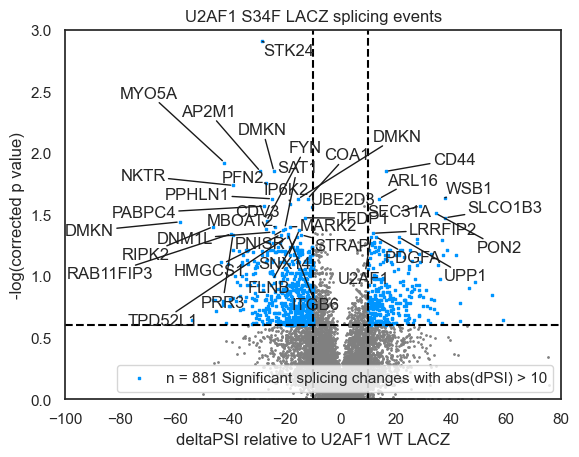

In [74]:
#specify coordinates for significant dots and coordinates for labeling gene names
sns.set_theme(style='white')

sig1 = nojcnonly_named_s34flacz[(abs(nojcnonly_named_s34flacz['delta_val'])>=10)
                                &(nojcnonly_named_s34flacz['neglogp']> 0.60205999132)]
sig1text = nojcnonly_named_s34flacz[(abs(nojcnonly_named_s34flacz['delta_val'])>=10)
                                    &(nojcnonly_named_s34flacz['neglogp']>1.30102999566)]

#u2af1 s34f lacz vs wt lacz

plt.scatter(x=nojcnonly_named_s34flacz['delta_val'],y=nojcnonly_named_s34flacz['neglogp'], s=1, color='gray')
plt.scatter(x=sig1['delta_val'],y=sig1['neglogp'],s=4,
            label=("n = %s Significant splicing changes with abs(dPSI) > 10" % (len(sig1))),
            color='#0095FF', marker = 's')

plt.xlabel("deltaPSI relative to U2AF1 WT LACZ")
plt.ylabel("-log(corrected p value)")
plt.axvline(-10,color="black",linestyle="--")
plt.axvline(10,color="black",linestyle="--")
plt.axhline(0.6,color="black",linestyle="--")
plt.title('U2AF1 S34F LACZ splicing events')
# plt.yticks(range(-1, 15))
# plt.xticks([-60, -50, -40, -30, -20, -10, 0 , 10, 20, 30, 40, 50, 60])
plt.ylim(0, 3) 
plt.xlim(-100, 80)

texts1 = []
for i in range(len(sig1text)):
    #if sig2text.iloc[i].delta_val < 61:
    texts1.append(plt.text(x= sig1text.iloc[i].delta_val, y=sig1text.iloc[i].neglogp, s= sig1text.iloc[i].GeneName))
    
adjust_text(texts1, arrowprops = dict(arrowstyle = '-', color = 'k'))

plt.legend(loc='lower right', facecolor="white")
plt.savefig("Downloads/dpsi_volcano_s34flacz.pdf", format='pdf', transparent=True)

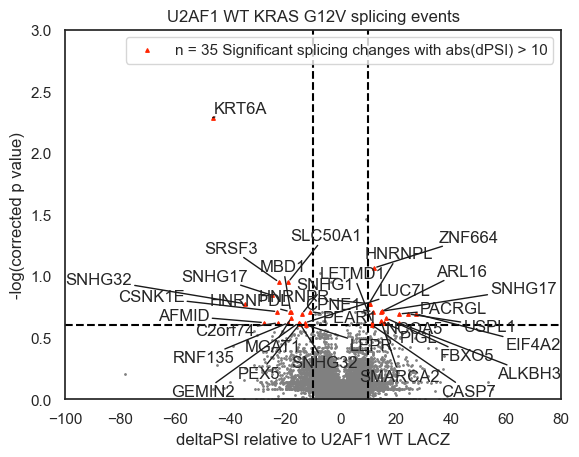

In [75]:
#u2af1 wt kras g12v vs wt lacz

sig2 = nojcnonly_named_wtkv12[(abs(nojcnonly_named_wtkv12['delta_val'])>=10)
                              &(nojcnonly_named_wtkv12['neglogp']> 0.60205999132)]
sig2text = nojcnonly_named_wtkv12[(abs(nojcnonly_named_wtkv12['delta_val'])>=10)
                                  &(nojcnonly_named_wtkv12['neglogp']> 0.60205999132)]

plt.scatter(x=nojcnonly_named_wtkv12['delta_val'],y=nojcnonly_named_wtkv12['neglogp'], s=1, color='gray')
plt.scatter(x=sig2['delta_val'],y=sig2['neglogp'],s=6,
            label=("n = %s Significant splicing changes with abs(dPSI) > 10" % (len(sig2))),
            color='#FF2501', marker='^')

plt.xlabel("deltaPSI relative to U2AF1 WT LACZ")
plt.ylabel("-log(corrected p value)")
plt.axvline(-10,color="black",linestyle="--")
plt.axvline(10,color="black",linestyle="--")
plt.axhline(0.6,color="black",linestyle="--")
plt.title('U2AF1 WT KRAS G12V splicing events')
# plt.yticks(range(-1, 15))
# plt.xticks([-60, -50, -40, -30, -20, -10, 0 , 10, 20, 30, 40, 50, 60])
plt.ylim(0, 3) 
plt.xlim(-100, 80)

texts1 = []
for i in range(len(sig2text)):
    #if sig2text.iloc[i].delta_val < 61:
    texts1.append(plt.text(x= sig2text.iloc[i].delta_val, y=sig2text.iloc[i].neglogp, s= sig2text.iloc[i].GeneName))
    
adjust_text(texts1, arrowprops = dict(arrowstyle = '-', color = 'k'))

plt.legend(loc='upper right', facecolor="white")
plt.savefig("Downloads/dpsi_volcano_wtkv12.pdf", format='pdf', transparent=True)

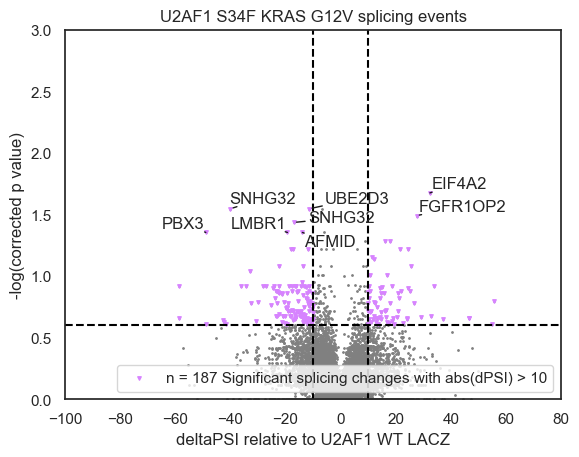

In [76]:
sig3 = nojcnonly_named_s34fkv12[(abs(nojcnonly_named_s34fkv12['delta_val'])>=10)&
                                (nojcnonly_named_s34fkv12['neglogp']> 0.60205999132)]
sig3text = nojcnonly_named_s34fkv12[(abs(nojcnonly_named_s34fkv12['delta_val'])>=10)&
                                    (nojcnonly_named_s34fkv12['neglogp']> 1.30102999566)]

#u2af1 s34f kras g12v vs u2af1 wt lacz
#plot volcano plot with lines marking deltapsi 10 and sig p value

plt.scatter(x=nojcnonly_named_s34fkv12['delta_val'],y=nojcnonly_named_s34fkv12['neglogp'], s=1, color='gray')
plt.scatter(x=sig3['delta_val'],y=sig3['neglogp'],s=6,
            label=("n = %s Significant splicing changes with abs(dPSI) > 10" % (len(sig3))),
            color='#D783FF', marker="v")

plt.xlabel("deltaPSI relative to U2AF1 WT LACZ")
plt.ylabel("-log(corrected p value)")
plt.axvline(-10,color="black",linestyle="--")
plt.axvline(10,color="black",linestyle="--")
plt.axhline(0.6,color="black",linestyle="--")
plt.title('U2AF1 S34F KRAS G12V splicing events')
# plt.yticks(range(-1, 15))
# plt.xticks([-60, -50, -40, -30, -20, -10, 0 , 10, 20, 30, 40, 50, 60])
plt.ylim(0, 3) 
plt.xlim(-100, 80)

texts1 = []
for i in range(len(sig3text)):
    texts1.append(plt.text(x= sig3text.iloc[i].delta_val, y=sig3text.iloc[i].neglogp, s= sig3text.iloc[i].GeneName))
    
adjust_text(texts1, arrowprops = dict(arrowstyle = '-', color = 'k'))

plt.legend(loc='lower right', facecolor="white")
plt.savefig("Downloads/dpsi_volcano_s34fkv12.pdf", format='pdf', transparent=True)

# create stacked bar plots based on global event types

In [46]:
s34flaczdict  = {}
wtkv12dict = {}
s34fkv12dict = {}

dflist = [[nojcnonly_named_s34flacz, s34flaczdict],[nojcnonly_named_wtkv12, wtkv12dict], 
          [nojcnonly_named_s34fkv12, s34fkv12dict]]

for pair in dflist:
    pair[0] = pair[0].loc[(pair[0]['corrected_pval'] < 0.25) &(abs(pair[0]['delta_val']) >=10)]
#     filter for corrected p value significant. then count # events in these categories

    AltAcc = len(pair[0].loc[(pair[0]['as_event_type'] == 'alternative_acceptor')])
    altDon = len(pair[0].loc[(pair[0]['as_event_type'] == 'alternative_donor')])
    alt1stE = len(pair[0].loc[(pair[0]['as_event_type'] == 'alternative_first_exon')])
    altLE = len(pair[0].loc[(pair[0]['as_event_type'] == 'alternative_last_exon')])
    cass = len(pair[0].loc[(pair[0]['as_event_type'] == 'cassette')])
    corcass = len(pair[0].loc[(pair[0]['as_event_type'] == 'coord_cassette')])
    
    #for intron retention, only select events from known/annotated junctions
    kIR = len(pair[0].loc[(pair[0]['as_event_type'] == 'intron_retention') & 
                 (pair[0]['#Contains_Novel_or_Only_Known(Annotated)_Junctions'] == 'K')])
    ME = len(pair[0].loc[(pair[0]['as_event_type'] == 'mutually_exclusive')])
    
    #assign numbers to the dictionary keys
    pair[1]['Alternative acceptor'] = AltAcc
    pair[1]['Alternative donor'] = altDon
    pair[1]['Alternative first exon'] = alt1stE
    pair[1]['Alternative last exon'] = altLE
    pair[1]['Cassette'] = cass
    pair[1]['Intron retention'] = kIR
    pair[1]['Coordinate cassette'] = corcass
    pair[1]['Mutually exclusive'] = ME

# {'alternative_acceptor',
#  'alternative_donor',
#  'alternative_first_exon',
#  'alternative_last_exon',
#  'cassette',
#  'coord_cassette',
#  'intron_retention',
#  'jcn_only_AA',
#  'jcn_only_AD',
#  'mutually_exclusive'}
s34fkv12dict

{'Alternative acceptor': 11,
 'Alternative donor': 4,
 'Alternative first exon': 19,
 'Alternative last exon': 1,
 'Cassette': 145,
 'Intron retention': 1,
 'Coordinate cassette': 6,
 'Mutually exclusive': 0}

In [48]:
#concatenate genotypes together
#assemble dataframes

s34flacz_ttestevents = pd.DataFrame.from_dict([s34flaczdict])
wtkv12_ttestevents = pd.DataFrame.from_dict([wtkv12dict])
s34fkv12_ttestevents = pd.DataFrame.from_dict([s34fkv12dict])

s34flacz_ttestevents.index = ['U2AF1 S34F LACZ'] 
wtkv12_ttestevents.index = ['U2AF1 WT KRAS G12V'] 
s34fkv12_ttestevents.index = ['U2AF1 S34F KRAS G12V']

#concat frames
frames = [s34flacz_ttestevents, wtkv12_ttestevents, s34fkv12_ttestevents]

jbttestconcat = pd.concat(frames)
jbttestconcat['Sum'] = jbttestconcat.sum(axis=1)
jbttestconcat

,Alternative acceptor,Alternative donor,Alternative first exon,Alternative last exon,Cassette,Intron retention,Coordinate cassette,Mutually exclusive,Sum
U2AF1 S34F LACZ,55,20,38,59,681,0,22,6,881
U2AF1 WT KRAS G12V,1,0,10,0,24,0,0,0,35
U2AF1 S34F KRAS G12V,11,4,19,1,145,1,6,0,187


In [49]:
#calculate fractions for each splicing event

#transform each value to get %

for i, row in jbttestconcat.iterrows():
    jbttestconcat.at[i, 'Alternative acceptor'] = jbttestconcat.at[i, 'Alternative acceptor']/jbttestconcat.at[i, 'Sum']
    jbttestconcat.at[i, 'Alternative donor'] = jbttestconcat.at[i, 'Alternative donor']/jbttestconcat.at[i, 'Sum']
    jbttestconcat.at[i, 'Alternative first exon'] = jbttestconcat.at[i, 'Alternative first exon']/jbttestconcat.at[i, 'Sum']
    jbttestconcat.at[i, 'Alternative last exon'] = jbttestconcat.at[i, 'Alternative last exon']/jbttestconcat.at[i, 'Sum']
    jbttestconcat.at[i, 'Cassette'] = jbttestconcat.at[i, 'Cassette']/jbttestconcat.at[i,'Sum']
    jbttestconcat.at[i, 'Intron retention'] = jbttestconcat.at[i, 'Intron retention']/jbttestconcat.at[i,'Sum']
    jbttestconcat.at[i, 'Coordinate cassette'] = jbttestconcat.at[i, 'Coordinate cassette']/jbttestconcat.at[i,'Sum']
    jbttestconcat.at[i, 'Mutually exclusive'] = jbttestconcat.at[i, 'Mutually exclusive']/jbttestconcat.at[i,'Sum']
    
jbttestconcat

,Alternative acceptor,Alternative donor,Alternative first exon,Alternative last exon,Cassette,Intron retention,Coordinate cassette,Mutually exclusive,Sum
U2AF1 S34F LACZ,0.062429,0.022701,0.043133,0.066969,0.772985,0.000000,0.024972,0.00681,881
U2AF1 WT KRAS G12V,0.028571,0.000000,0.285714,0.000000,0.685714,0.000000,0.000000,0.00000,35
U2AF1 S34F KRAS G12V,0.058824,0.021390,0.101604,0.005348,0.775401,0.005348,0.032086,0.00000,187


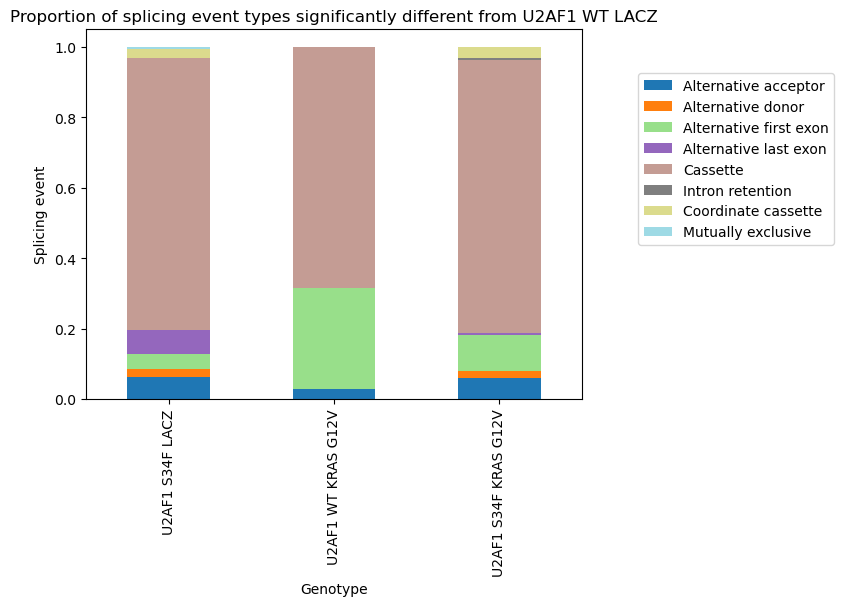

In [27]:
jbttestconcat_plot = jbttestconcat.drop(['Sum'], axis=1)
# create stacked bar chart for monthly temperatures
#add genotype column

ax = jbttestconcat_plot.plot(kind='bar', stacked=True, cmap='tab20')

# labels for x & y axis
plt.xlabel('Genotype')
plt.ylabel('Splicing event')
 
# title of plot
plt.title('Proportion of splicing event types significantly different from U2AF1 WT LACZ')


# psi_pvalue_s34flaczdf.plot(kind='bar', stacked=True, palette = 'turbo')
plt.legend(bbox_to_anchor=(1.1, 0.9))

# quantify proportion of novel vs. known splice junctions
## exclude junction only events and novel IR events

In [51]:
s34flacznovelsdict  = {}
wtkv12novelsdict = {}
s34fkv12novelsdict = {}

dflist = [[nojcnonly_named_s34flacz, s34flacznovelsdict],[nojcnonly_named_wtkv12, wtkv12novelsdict], 
          [nojcnonly_named_s34fkv12, s34fkv12novelsdict]]

#count number of things per event for each genotype

for pair in dflist:
#     pair[0] = pair[0][pair[0]['Gene Name'].isin(KRASDNset)]
    pair[0] = pair[0].loc[(pair[0]['corrected_pval'] < 0.25)&(abs(pair[0]['delta_val']) >=10)]
    known = len(pair[0].loc[(pair[0]['#Contains_Novel_or_Only_Known(Annotated)_Junctions'] == 'K') & 
                            (pair[0]['as_event_type'] != 'jcn_only_AA') &  
                            (pair[0]['as_event_type'] != 'jcn_only_AD')])
    novel = len(pair[0].loc[(pair[0]['#Contains_Novel_or_Only_Known(Annotated)_Junctions'] == 'N') & 
                            (pair[0]['as_event_type'] != 'jcn_only_AA') &  
                            (pair[0]['as_event_type'] != 'jcn_only_AD') & 
                           (pair[0]['as_event_type'] != 'intron_retention')])         
    
    pair[1]['Known splice junction'] = known
    pair[1]['Novel splice junction'] = novel

#assemble dataframes

s34flacz_ttestKN = pd.DataFrame.from_dict([s34flacznovelsdict])
wtkv12_ttestKN = pd.DataFrame.from_dict([wtkv12novelsdict])
s34fkv12_ttestKN = pd.DataFrame.from_dict([s34fkv12novelsdict])

s34flacz_ttestKN.index = ['U2AF1 S34F LACZ'] 
wtkv12_ttestKN.index = ['U2AF1 WT KRAS G12V'] 
s34fkv12_ttestKN.index = ['U2AF1 S34F KRAS G12V']

#concat frames
frames = [s34flacz_ttestKN, wtkv12_ttestKN, s34fkv12_ttestKN]

jbttestconcat = pd.concat(frames)

jbttestconcat['Sum'] = jbttestconcat.sum(axis=1)
jbttestconcat

,Known splice junction,Novel splice junction,Sum
U2AF1 S34F LACZ,297,584,881
U2AF1 WT KRAS G12V,11,24,35
U2AF1 S34F KRAS G12V,58,129,187


In [52]:
# #transform each value to get %

for i, row in jbttestconcat.iterrows():
    jbttestconcat.at[i, 'Known splice junction'] = jbttestconcat.at[i, 'Known splice junction']/jbttestconcat.at[i, 'Sum']
    jbttestconcat.at[i, 'Novel splice junction'] = jbttestconcat.at[i, 'Novel splice junction']/jbttestconcat.at[i, 'Sum']



jbttestconcat

,Known splice junction,Novel splice junction,Sum
U2AF1 S34F LACZ,0.337117,0.662883,881
U2AF1 WT KRAS G12V,0.314286,0.685714,35
U2AF1 S34F KRAS G12V,0.310160,0.689840,187


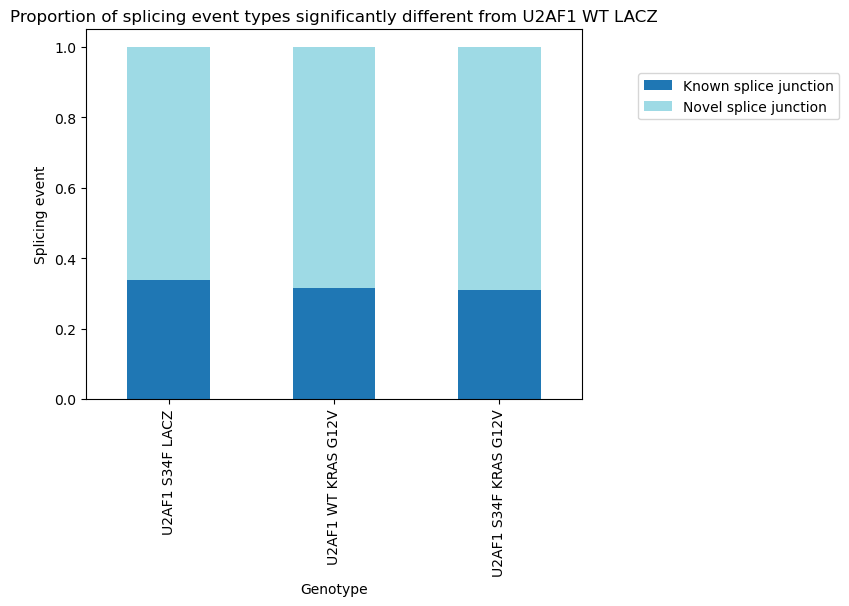

In [53]:
jbttestconcat_plot = jbttestconcat.drop(['Sum'], axis=1)
# create stacked bar chart for monthly temperatures
#add genotype column

ax = jbttestconcat_plot.plot(kind='bar', stacked=True, cmap='tab20')

# labels for x & y axis
plt.xlabel('Genotype')
plt.ylabel('Splicing event')
 
# title of plot
plt.title('Proportion of splicing event types significantly different from U2AF1 WT LACZ')


# psi_pvalue_s34flaczdf.plot(kind='bar', stacked=True, palette = 'turbo')
plt.legend(bbox_to_anchor=(1.1, 0.9))

# Generate RNK file for GSEA

In [62]:
#sort by deltaPSI, then keep the first entry (highest value absdeltaPSI)

#filter data frames by padj < 0.25
s34flacz_padj025 = nojcnonly_named_s34flacz.loc[(nojcnonly_named_s34flacz['corrected_pval'] < 0.25)]
wtkv12_padj025 = nojcnonly_named_wtkv12.loc[(nojcnonly_named_wtkv12['corrected_pval'] < 0.25)]
s34fkv12_padj025 = nojcnonly_named_s34fkv12.loc[(nojcnonly_named_s34fkv12['corrected_pval'] < 0.25)]

#take absolute value of dPSI
dflist = [s34flacz_padj025, wtkv12_padj025, s34fkv12_padj025]
for df in dflist:
    df['abs(dPSI)'] = abs(df['delta_val'])

#for duplciates, keep only highest deltapsi entry
#first sort by descending abspsi

s34flacz_padj025 = s34flacz_padj025.sort_values(['abs(dPSI)'], ascending=False)
wtkv12_padj025 = wtkv12_padj025.sort_values(['abs(dPSI)'], ascending=False)
s34fkv12_padj025 = s34fkv12_padj025.sort_values(['abs(dPSI)'], ascending=False)
    
#now, keep only the highest of a dup gene entry
s34flacz_unique = s34flacz_padj025.drop_duplicates(subset = ['GeneName'], keep = "first", inplace=False)
wtkv12_unique = wtkv12_padj025.drop_duplicates(subset = ['GeneName'], keep = "first", inplace=False)
s34fkv12_unique = s34fkv12_padj025.drop_duplicates(subset = ['GeneName'], keep = "first", inplace=False)

s34flacz_unique.head(5)

# LDHA	0.640569	59.02

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/1353120253.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abs(dPSI)'] = abs(df['delta_val'])
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/1353120253.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abs(dPSI)'] = abs(df['delta_val'])
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/1353120253.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,corrected_pval,GeneName,neglogp,abs(dPSI)
27710,N,alternative_acceptor,NaN,chr11:18405573-18405993;chr11:18405573-18412708;chr11:18405573-18407134;chr11:18405573-18407151,chr11:18405573-18407173,NaN,chr11:18405994-18407134;chr11:18407135-18407151;chr11:18407152-18407173;chr11:18407174-18412708,chr11:18407134-18407135;chr11:18407151-18407152;chr11:18407173-18407174;chr11:18412708-18412709,NaN,59.02,0.228787,LDHA,0.640569,59.02
5188,N,coord_cassette,ENSG00000161249.21,chr19:35505766-35509910,chr19:35505766-35507457;chr19:35507512-35508204;chr19:35508241-35509910,NaN,chr19:35507458-35507511;chr19:35508205-35508240,NaN,NaN,-58.34,0.036332,DMKN,1.439711,58.34
5655,N,alternative_donor,NaN,chr12:68816946-68820348,chr12:68818874-68820348,NaN,chr12:68816946-68818873,chr12:68816945-68816946,NaN,54.90,0.141790,MDM2,0.848354,54.90
25580,N,alternative_acceptor,NaN,chr2:201258155-201260556;chr2:201258155-201266486,chr2:201258155-201266460,NaN,chr2:201260557-201266460;chr2:201266461-201266486,chr2:201266460-201266461;chr2:201266486-201266487,NaN,-53.95,0.228787,CASP8,0.640569,53.95
4124,K,alternative_first_exon,ENSG00000138835.22,chr9:113591476-113594429;chr9:113591398-113594429,chr9:113594339-113594429,chr9:113591333-113591397,chr9:113593486-113594338,NaN,NaN,48.91,0.112674,RGS3,0.948176,48.91


In [64]:
#now convert to RNK file

#first only keep gene name and delta cols
s34flacz_RNK = s34flacz_unique.loc[:, s34flacz_unique.columns.isin(['GeneName', 'abs(dPSI)'])]
wtkv12_RNK = wtkv12_unique.loc[:, wtkv12_unique.columns.isin(['GeneName', 'abs(dPSI)'])]
s34fkv12_RNK = s34fkv12_unique.loc[:, s34fkv12_unique.columns.isin(['GeneName', 'abs(dPSI)'])]

dflist = [s34flacz_RNK, wtkv12_RNK, s34fkv12_RNK]
for df in dflist:
# then rename gene name to #Gene and reorder columns
    df = df.rename(columns = {'GeneName':'#Gene'}, inplace = True)
    
column_order = ['#Gene', 'abs(dPSI)']

s34flacz_reorder = s34flacz_RNK.reindex(column_order, axis = 1)
wtkv12_reorder = wtkv12_RNK.reindex(column_order, axis = 1)
s34fkv12_reorder = s34fkv12_RNK.reindex(column_order, axis = 1)

wtkv12_reorder.head(5)
# KRT6A	46.40

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/3641840153.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'GeneName':'#Gene'}, inplace = True)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/3641840153.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'GeneName':'#Gene'}, inplace = True)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/3641840153.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

,#Gene,abs(dPSI)
4526,KRT6A,46.40
4247,SNHG32,34.83
12911,AFMID,27.80
8352,EIF4A2,27.38
26632,SNHG17,24.94


In [65]:
#export as RNK files
s34flacz_reorder.to_csv('20240421c2_absdpsi_s34flacz_jb.RNK', sep='\t', index=False)
wtkv12_reorder.to_csv('20240421c2_absdpsi_wtkv12_jb.RNK', sep='\t', index=False)
s34fkv12_reorder.to_csv('20240421c2_absdpsi_s34fkv12_jb.RNK', sep='\t', index=False)

## plot genes and their event types in KRAS DN set

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/4163771221.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/4163771221.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/4163771221.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

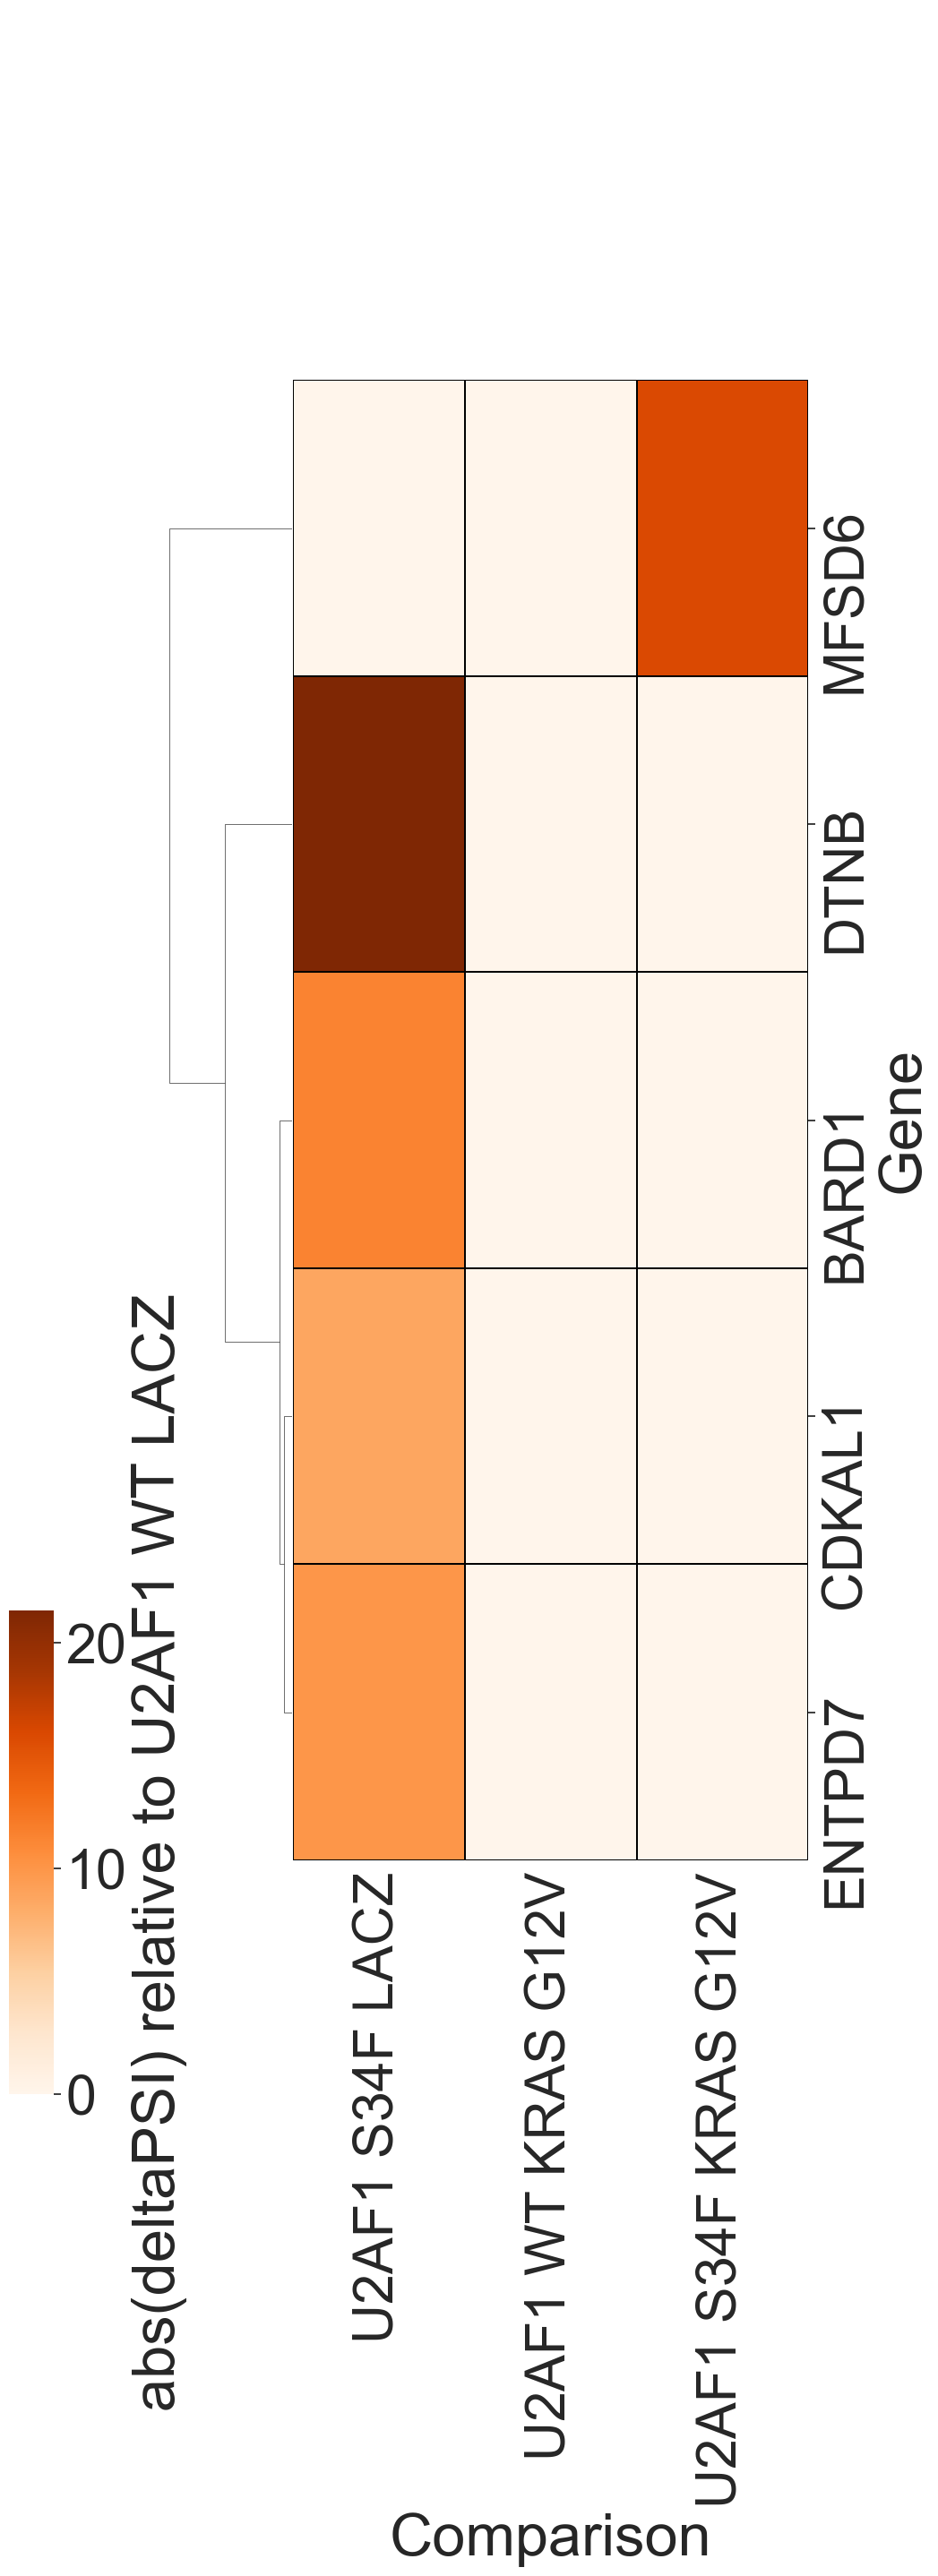

In [77]:
KRASDNstr = 'ABCB11,ABCG4,ACTC1,COQ8A,ADRA2C,AKR1B10,ALOX12B,AMBN,ARHGDIG,ARPP21,ASB7,ATP4A,ATP6V1B1,BARD1,BMPR1B,BRDT,BTG2,C5,CACNA1F,CACNG1,CALCB,CALML5,CAMK1D,CAPN9,CCDC106,VPS50,CCNA1,CCR8,CD207,CD40LG,CD80,CDH16,CDKAL1,CELSR2,CHRNG,CHST2,CKM,CLDN16,CLDN8,CLPS,CLSTN3,CNTFR,COL2A1,COPZ2,CPA2,CPB1,CPEB3,CYP11B2,CYP39A1,DCC,DLK2,DTNB,EDAR,EDN1,EDN2,EFHD1,EGF,ENTPD7,EPHA5,ZC2HC1C,TENT5C,FGF16,FGF22,FGFR3,FGGY,FSHB,GAMT,GDNF,GP1BA,GP2,GPR19,GPR3,GPRC5C,GRID2,GTF3C5,MACROH2A2,HNF1A,HSD11B2,HTR1B,HTR1D,IDUA,IFI44L,IFNG,IGFBP2,IL12B,IL5,INSL5,IRS4,ITGB1BP2,ITIH3,KCND1,KCNE2,KCNMB1,KCNN1,KCNQ2,KLHDC8A,KLK7,KLK8,KRT1,KRT13,KRT15,KRT4,KRT5,LFNG,LGALS7,LYPD3,MAGIX,MAST3,MEFV,MFSD6,KMT2D,MSH5,MTHFR,MX1,MYH7,MYO15A,MYOT,NGB,NOS1,NPHS1,NR4A2,NR6A1,NRIP2,NTF3,NUDT11,TENM2,OXT,P2RX6,P2RY4,PRKN,PAX3,PAX4,PCDHB1,PDCD1,PDE6B,PDK2,PKP1,PLAG1,PNMT,NPY4R,PRODH,PROP1,PTGFR,PTPRJ,RGS11,RIBC2,RSAD2,RYR1,RYR2,SCGB1A1,SCN10A,SELENOP,SERPINA10,SERPINB2,SGK1,SHOX2,SIDT1,SKIL,SLC12A3,SLC16A7,SLC25A23,SLC29A3,SLC30A3,SLC38A3,SLC5A5,SLC6A14,SLC6A3,SMPX,SNCB,SNN,SOX10,SPHK2,SPRR3,SPTBN2,SSTR4,STAG3,SYNPO,TAS2R4,TCF7L1,TCL1A,TEX15,TFAP2B,TFCP2L1,TFF2,TG,TGFB2,TGM1,THNSL2,THRB,TLX1,TNNI3,TSHB,UGT2B17,UPK3B,VPREB1,WNT16,YBX2,YPEL1,ZBTB16,ZNF112'
KRASDNset = set(KRASDNstr.split(','))
KRASDNlist = KRASDNstr.split(',')

sns.set(font_scale=4)

#combine dataframes for gene level heatmap
dflist = [s34flacz_RNK, s34fkv12_RNK, wtkv12_RNK]
for df in dflist:
    df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)

s34flacz_RNK['Comparison'] = 'U2AF1 S34F LACZ'
wtkv12_RNK['Comparison'] = 'U2AF1 WT KRAS G12V'
s34fkv12_RNK['Comparison'] = 'U2AF1 S34F KRAS G12V'

#concat dataframes
s34flacz_wtkv12 = pd.concat([s34flacz_RNK, wtkv12_RNK], ignore_index=True)
s34flacz_wtkv12_s34fkv12 = pd.concat([s34fkv12_RNK, s34flacz_wtkv12], ignore_index=True)

krasDownPSI_df = s34flacz_wtkv12_s34fkv12[s34flacz_wtkv12_s34fkv12['Gene'].isin(KRASDNlist)]

# #pivot dataframes for heatmap
heatmap_df = pd.pivot_table(krasDownPSI_df, values='abs(dPSI)', index='Gene', columns='Comparison')

# reorder columns for plotting
column_order = ['U2AF1 S34F LACZ', 'U2AF1 WT KRAS G12V', 'U2AF1 S34F KRAS G12V']
heatmap_df = heatmap_df.reindex(column_order, axis=1)

heatmap_df = heatmap_df.fillna(0)

cg = sns.clustermap(heatmap_df, figsize=(10, 30), xticklabels=True, yticklabels=True, col_cluster=False, linecolor='black', 
               linewidths = 0.01, 
                    cmap="Oranges", 
                    cbar_pos=(-.1, .2, 0.05, 0.18),
                    cbar_kws = {'label':'abs(deltaPSI) relative to U2AF1 WT LACZ'})
cg.savefig("Downloads/krasdn_dpsi_heatmap.pdf", format='pdf', transparent=True)

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/772678006.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/772678006.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/772678006.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

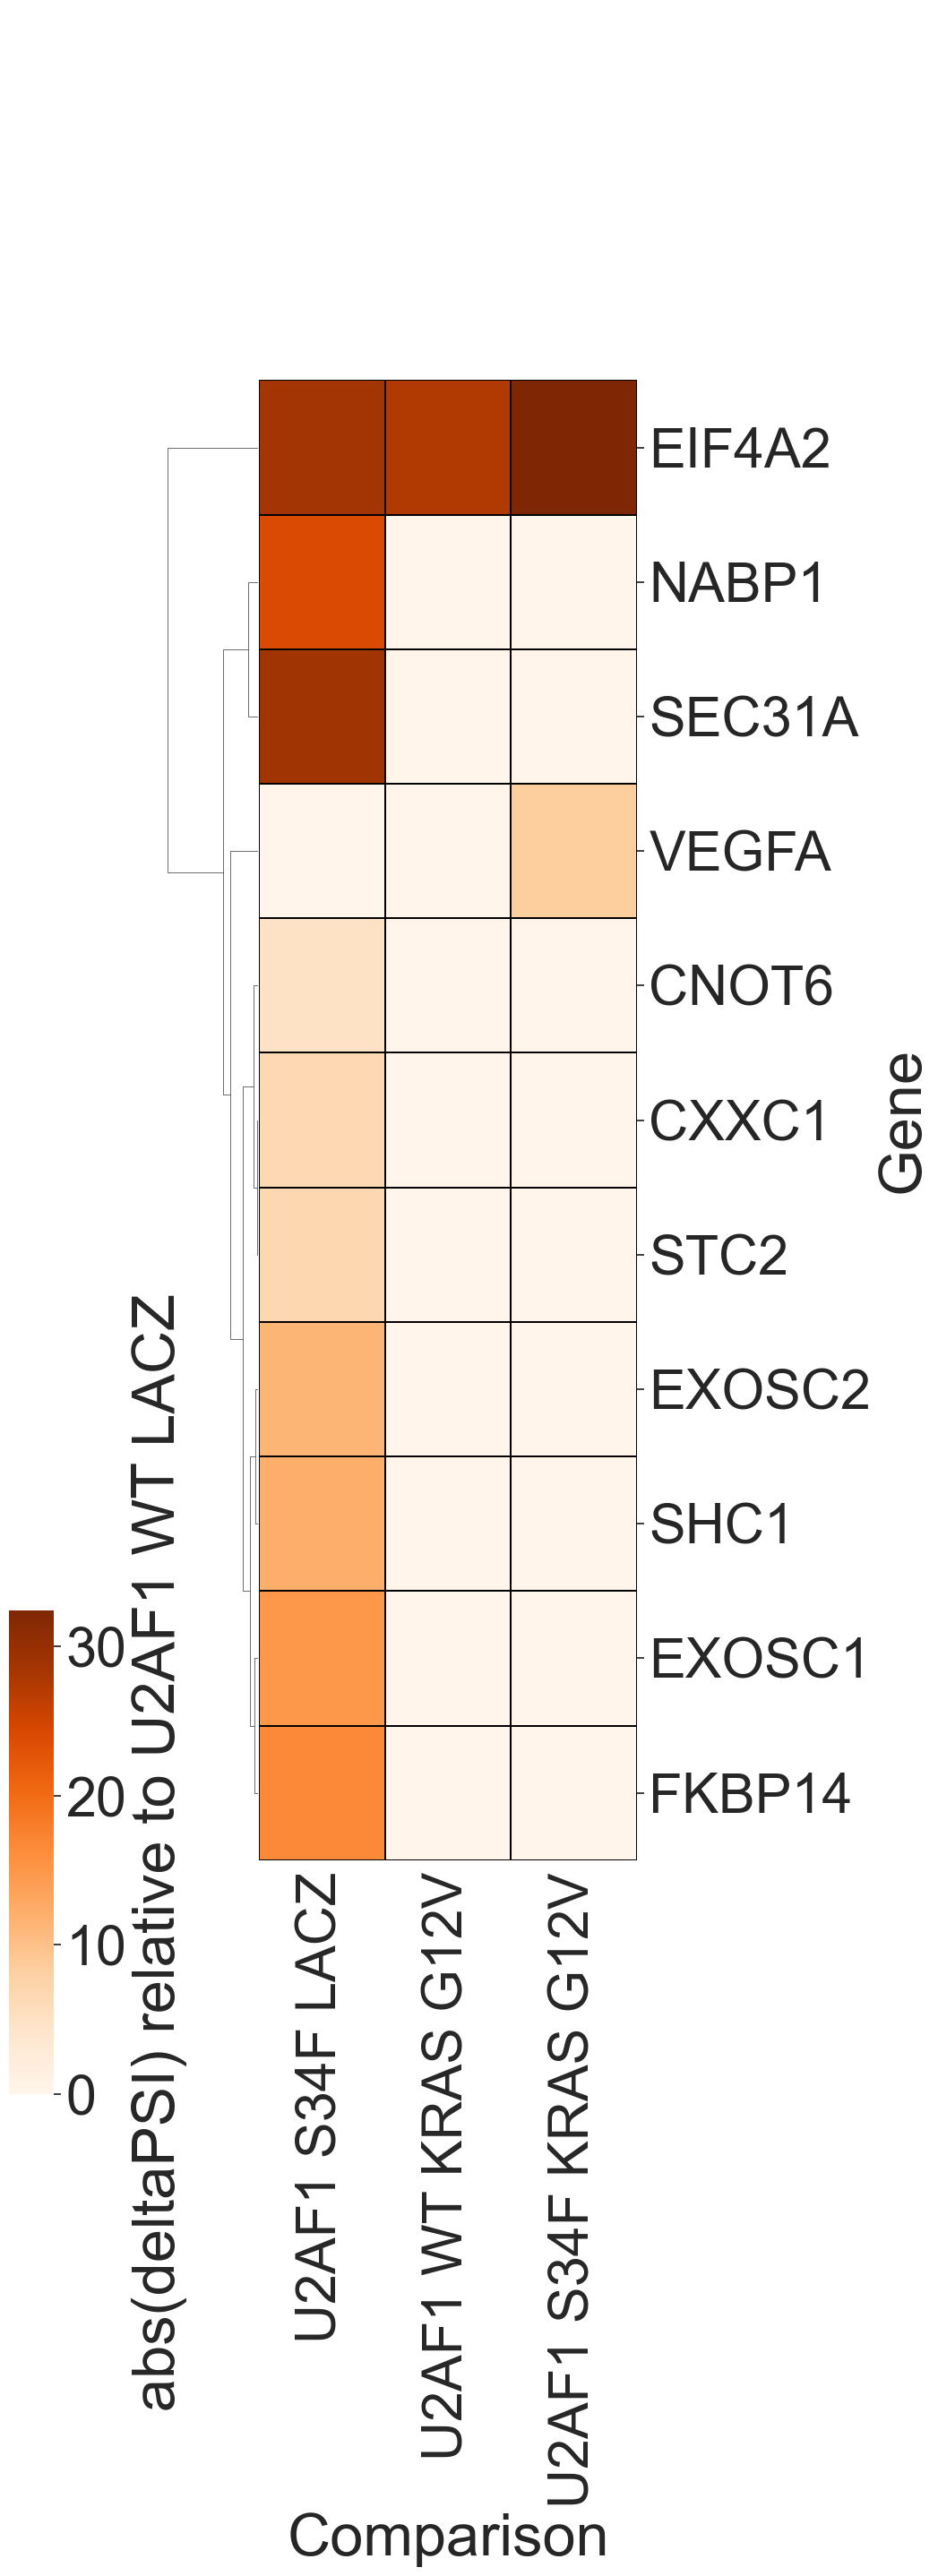

In [80]:
unfoldedproteinstr = 'ALDH18A1,ARFGAP1,ASNS,ATF3,ATF4,ATF6,ATP6V0D1,BAG3,BANF1,CALR,CCL2,CEBPB,CEBPG,CHAC1,CKS1B,CNOT2,CNOT4,CNOT6,CXXC1,DCP1A,DCP2,DCTN1,DDIT4,DDX10,DKC1,DNAJA4,DNAJB9,DNAJC3,EDC4,EDEM1,EEF2,EIF2AK3,EIF2S1,EIF4A1,EIF4A2,EIF4A3,EIF4E,EIF4EBP1,EIF4G1,ERN1,ERO1A,EXOC2,EXOSC1,EXOSC10,EXOSC2,EXOSC4,EXOSC5,EXOSC9,FKBP14,FUS,GEMIN4,GOSR2,H2AX,HERPUD1,HSP90B1,HSPA5,HSPA9,HYOU1,IARS1,IFIT1,IGFBP1,IMP3,KDELR3,KHSRP,KIF5B,LSM1,LSM4,MTHFD2,NFYA,NFYB,NHP2,NOLC1,NOP14,NOP56,NPM1,NABP1,PAIP1,PARN,PDIA5,PDIA6,POP4,PREB,PSAT1,RPS14,RRP9,SDAD1,SEC11A,SEC31A,SERP1,SHC1,MTREX,SLC1A4,SLC30A5,SLC7A5,SPCS1,SPCS3,SRPRA,SRPRB,SSR1,STC2,TARS1,TATDN2,TSPYL2,SKIC3,TUBB2A,VEGFA,WFS1,WIPI1,XBP1,XPOT,YIF1A,YWHAZ,ZBTB17'

unfoldedproteinset = set(unfoldedproteinstr.split(','))
unfoldedproteinlist = unfoldedproteinstr.split(',')

sns.set(font_scale=4)

#combine dataframes for gene level heatmap
dflist = [s34flacz_RNK, s34fkv12_RNK, wtkv12_RNK]
for df in dflist:
    df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)

s34flacz_RNK['Comparison'] = 'U2AF1 S34F LACZ'
wtkv12_RNK['Comparison'] = 'U2AF1 WT KRAS G12V'
s34fkv12_RNK['Comparison'] = 'U2AF1 S34F KRAS G12V'

#concat dataframes
s34flacz_wtkv12 = pd.concat([s34flacz_RNK, wtkv12_RNK], ignore_index=True)
s34flacz_wtkv12_s34fkv12 = pd.concat([s34fkv12_RNK, s34flacz_wtkv12], ignore_index=True)

unfoldedPSI_df = s34flacz_wtkv12_s34fkv12[s34flacz_wtkv12_s34fkv12['Gene'].isin(unfoldedproteinlist)]

# #pivot dataframes for heatmap
heatmap_df = pd.pivot_table(unfoldedPSI_df, values='abs(dPSI)', index='Gene', columns='Comparison')

# reorder columns for plotting
column_order = ['U2AF1 S34F LACZ', 'U2AF1 WT KRAS G12V', 'U2AF1 S34F KRAS G12V']
heatmap_df = heatmap_df.reindex(column_order, axis=1)

heatmap_df = heatmap_df.fillna(0)

cg = sns.clustermap(heatmap_df, figsize=(10, 30), xticklabels=True, yticklabels=True, col_cluster=False, linecolor='black', 
               linewidths = 0.01, 
                    cmap="Oranges", 
                    cbar_pos=(-.1, .2, 0.05, 0.18),
                    cbar_kws = {'label':'abs(deltaPSI) relative to U2AF1 WT LACZ'})
# cg.savefig("Downloads/krasdn_dpsi_heatmap.pdf", format='pdf', transparent=True)

# plot SG protein gene set 

In [66]:
#load SG protein gene set as dataframe 
sgproteindf = pd.read_csv('Protein_sgs.GMX', sep='\t')

In [67]:
#clean up SG list to only get gene names

Markmiller_4list = sgproteindf['SG_pr Markmiller_4'].tolist()
Markmiller_4list

# removelist = ['na', 'nan']

Markmiller_genelist = [i for i in Markmiller_4list if i != 'na']
Markmiller_genelist = [i for i in Markmiller_genelist if str(i) != 'nan']
Markmiller_genelist

['ABCF1',
 'ADD1',
 'AGO1',
 'AQR',
 'ATXN2',
 'BCCIP',
 'CASC3',
 'CCDC124',
 'CELF1',
 'CIRBP',
 'DAZAP1',
 'DDX1',
 'DDX3X',
 'DDX3Y',
 'DDX6',
 'DHX30',
 'DHX33',
 'DROSHA',
 'EIF3A',
 'EIF3D',
 'EIF3G',
 'EIF3H',
 'EIF4A2',
 'EIF4A3',
 'EIF4B',
 'EIF4G1',
 'EIF4G3',
 'EIF4H',
 'FAM120A',
 'FMR1',
 'FUBP3',
 'FUS',
 'FXR1',
 'FXR2',
 'G3BP1',
 'G3BP2',
 'HSPD1',
 'IGF2BP1',
 'IGF2BP2',
 'IGF2BP3',
 'LIN28B',
 'METAP2',
 'MSI1',
 'MSI2',
 'NELFE',
 'NKRF',
 'NOLC1',
 'NUFIP2',
 'PABPC4',
 'PARN',
 'PCBP2',
 'PNPT1',
 'PPP1R8',
 'PRRC2C',
 'PSPC1',
 'PUM1',
 'PUM2',
 'RBM15',
 'RBM17',
 'RBM25',
 'RECQL',
 'RPS11',
 'RPS24',
 'SAFB2',
 'SF1',
 'SLBP',
 'SND1',
 'SRP68',
 'SRSF5',
 'SRSF7',
 'SRSF9',
 'TIAL1',
 'TRIP6',
 'TROVE2',
 'UBAP2L',
 'UTP18',
 'XRN2',
 'YBX3',
 'ZC3H11A']

## plot abs(dPSI) for genes in Markmiller 4 protein SG set, for U2af1 S34f lacz only

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/2423735555.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/2423735555.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1080/2423735555.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

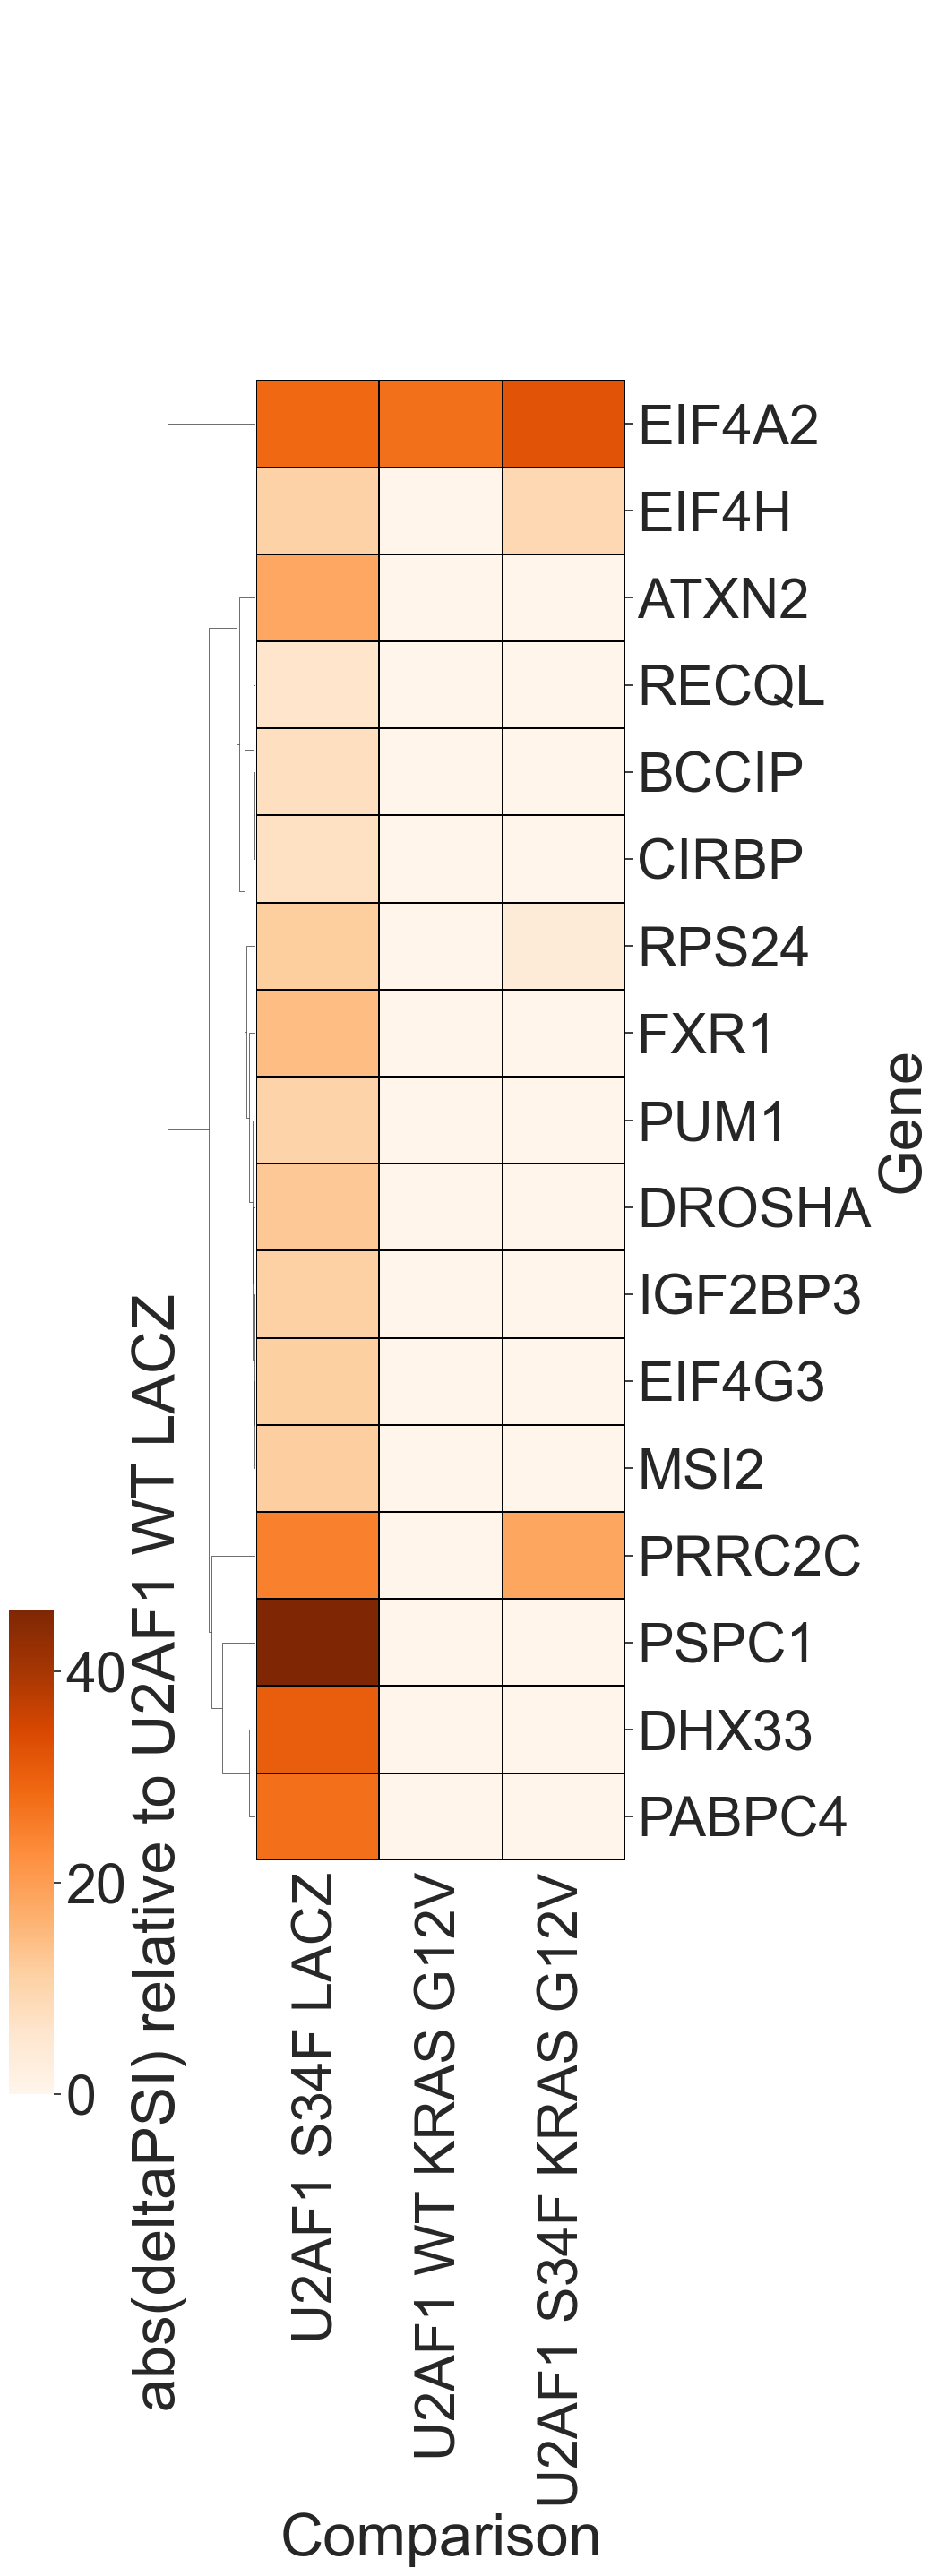

In [78]:
#plot for padj < 0.25

sns.set(font_scale=4)
#get genes that overlap with the SG gene set only

#combine dataframes for gene level heatmap
dflist = [s34flacz_RNK, s34fkv12_RNK, wtkv12_RNK]
for df in dflist:
    df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)
    
s34flacz_RNK['Comparison'] = 'U2AF1 S34F LACZ'
wtkv12_RNK['Comparison'] = 'U2AF1 WT KRAS G12V'
s34fkv12_RNK['Comparison'] = 'U2AF1 S34F KRAS G12V'

#filter for cols that correspond to gene in SG list
# for df in dflist:
#     df = df[df['Gene'].isin(Markmiller_genelist)] 

#concat dataframes
s34flacz_wtkv12 = pd.concat([s34flacz_RNK, wtkv12_RNK], ignore_index=True)
s34flacz_wtkv12_s34fkv12 = pd.concat([s34fkv12_RNK, s34flacz_wtkv12], ignore_index=True)
# s34flacz_wtkv12_s34fkv12

SGdpsi_df = s34flacz_wtkv12_s34fkv12[s34flacz_wtkv12_s34fkv12['Gene'].isin(Markmiller_genelist)]

# #pivot dataframes for heatmap
heatmap_df = pd.pivot_table(SGdpsi_df, values='abs(dPSI)', index='Gene', columns='Comparison')

# reorder columns for plotting
column_order = ['U2AF1 S34F LACZ', 'U2AF1 WT KRAS G12V', 'U2AF1 S34F KRAS G12V']
heatmap_df = heatmap_df.reindex(column_order, axis=1)


# check if there's anything with value = 0
# heatmap_df[heatmap_df.isin([0]).any(axis=1)] #got nothing, so replace NAs with 0

heatmap_df = heatmap_df.fillna(0)

cg = sns.clustermap(heatmap_df, figsize=(10, 30), xticklabels=True, yticklabels=True, col_cluster=False, linecolor='black', 
               linewidths = 0.01, 
                    cmap="Oranges", 
                    cbar_pos=(-.1, .2, 0.05, 0.18),
                    cbar_kws = {'label':'abs(deltaPSI) relative to U2AF1 WT LACZ'})
cg.savefig("Downloads/sg_dpsi_heatmap.pdf", format='pdf', transparent=True)